# VESTAS Case Study

# Introduction

# First Look at Data Set

Importing Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [45]:
xls = pd.ExcelFile('C:\Vestas\casestudy.xlsx')
df1 = pd.read_excel(xls, 'TurbineMasterData')
df2 = pd.read_excel(xls, 'SiteConditions')
df3 = pd.read_excel(xls, 'MaterialCost')

Merging the dataframes. We have our final dataset as df

In [46]:
df3=df3.rename(columns = {'DturbineID':'TurbineNumber'})
temp = pd.merge(df1, df2, on='TurbineNumber', how='inner')
df = pd.merge(temp, df3, on='TurbineNumber', how='inner')

There are 19 columns:
TurbineNumber, DParkID, Country, FrequencyHz, TurbineType, TurbineVersion, CurrentAge_Years, TowerHeightm, AltitudeM, TerrainElevation, ControllerType, TemperatureClassName, CapacityFactor, WindSpeed Stdev, Turbulence Intensity Estimated, HoursWithAmibientError, HoursWithGridEvents, TotalTimeHours, MaterialCost

In [47]:
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 19 columns:
TurbineNumber, DParkID, Country, FrequencyHz, TurbineType, TurbineVersion, CurrentAge_Years, TowerHeightm, AltitudeM, TerrainElevation, ControllerType, TemperatureClassName, CapacityFactor, WindSpeed Stdev, Turbulence Intensity Estimated, HoursWithAmibientError, HoursWithGridEvents, TotalTimeHours, MaterialCost, 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10452 entries, 0 to 10451
Data columns (total 19 columns):
TurbineNumber                     10452 non-null float64
DParkID                           10452 non-null float64
Country                           10452 non-null object
FrequencyHz                       10452 non-null float64
TurbineType                       10452 non-null object
TurbineVersion                    10452 non-null object
CurrentAge_Years                  10452 non-null float64
TowerHeightm                      10452 non-null float64
AltitudeM                         9772 non-null object
TerrainElevation                  10452 non-null float64
ControllerType                    10452 non-null float64
TemperatureClassName              10452 non-null object
CapacityFactor                    10452 non-null float64
WindSpeed Stdev                   10452 non-null float64
Turbulence Intensity Estimated    10452 non-null float64
HoursWithAmibientError            10452 no

In [49]:
 print(df.head())

   TurbineNumber  DParkID  Country  FrequencyHz TurbineType TurbineVersion  \
0      1556897.0   3318.0  Austria         50.0           A            MK1   
1      1598229.0  20306.0  Belgium         50.0           D          MK10B   
2      1671245.0   1270.0  Germany         50.0           A            MK1   
3      1671251.0   1270.0  Germany         50.0           A            MK1   
4      1671244.0   1270.0  Germany         50.0           A            MK1   

   CurrentAge_Years  TowerHeightm AltitudeM  TerrainElevation  ControllerType  \
0              14.0         100.0                       217.0             9.0   
1               3.0          95.0        95              77.0            11.0   
2              17.0          78.0                        88.0             9.0   
3              17.0          78.0                        78.0             9.0   
4              17.0          78.0                        82.0             9.0   

   TemperatureClassName  CapacityFactor  Win

# Checking the Countrywise Average Maintainence Cost

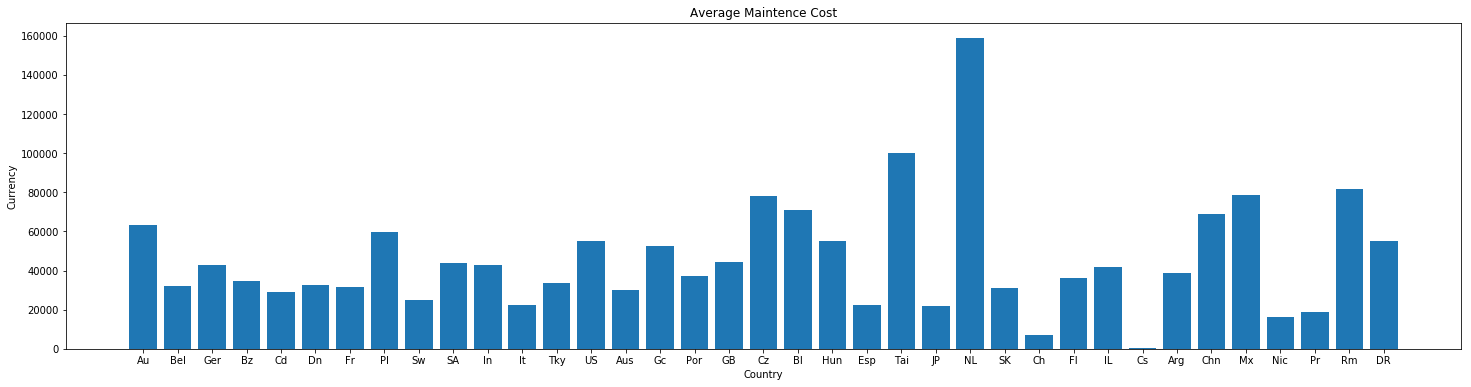

In [50]:
y = np.array([df[df['Country'] =='Austria']['MaterialCost'].mean(), df[df['Country'] =='Belgium']['MaterialCost'].mean(),
              df[df['Country'] =='Brazil']['MaterialCost'].mean(), df[df['Country'] =='Canada']['MaterialCost'].mean(),
              df[df['Country'] =='Denmark']['MaterialCost'].mean(), df[df['Country'] =='France']['MaterialCost'].mean(),
              df[df['Country'] =='Poland']['MaterialCost'].mean(), df[df['Country'] =='Sweden']['MaterialCost'].mean(),
              df[df['Country'] =='South Africa']['MaterialCost'].mean(), df[df['Country'] =='India']['MaterialCost'].mean(),
              df[df['Country'] =='Italy']['MaterialCost'].mean(), df[df['Country'] =='Turkey']['MaterialCost'].mean(),
              df[df['Country'] =='United States of America']['MaterialCost'].mean(), df[df['Country'] =='Australia']['MaterialCost'].mean(),
              df[df['Country'] =='Greece']['MaterialCost'].mean(), df[df['Country'] =='Portugal']['MaterialCost'].mean(),
              df[df['Country'] =='Great Britain']['MaterialCost'].mean(), df[df['Country'] =='Czech']['MaterialCost'].mean(),
              df[df['Country'] =='Bulgaria']['MaterialCost'].mean(), df[df['Country'] =='Hungary']['MaterialCost'].mean(),
              df[df['Country'] =='Spain']['MaterialCost'].mean(), df[df['Country'] =='Taiwan']['MaterialCost'].mean(),
              df[df['Country'] =='Japan']['MaterialCost'].mean(), df[df['Country'] =='Netherlands']['MaterialCost'].mean(),
              df[df['Country'] =='South Korea']['MaterialCost'].mean(), df[df['Country'] =='Chile']['MaterialCost'].mean(),
              df[df['Country'] =='Finland']['MaterialCost'].mean(), df[df['Country'] =='Ireland']['MaterialCost'].mean(),
              df[df['Country'] =='Cyprus']['MaterialCost'].mean(), df[df['Country'] =='Argentina']['MaterialCost'].mean(),
              df[df['Country'] =='Switzerland']['MaterialCost'].mean(), df[df['Country'] =='China']['MaterialCost'].mean(),
              df[df['Country'] =='Mexico']['MaterialCost'].mean(), df[df['Country'] =='Nicaragua']['MaterialCost'].mean(),
              df[df['Country'] =='Peru']['MaterialCost'].mean(), df[df['Country'] =='Romania']['MaterialCost'].mean(),
              df[df['Country'] =='The Dominican Republic']['MaterialCost'].mean(), df[df['Country'] =='Uruguay']['MaterialCost'].mean()])
x = ['Au', 'Bel', 'Ger', 'Bz', 'Cd', 'Dn',
       'Fr', 'Pl', 'Sw', 'SA', 'In', 'It',
       'Tky', 'US', 'Aus', 'Gc',
       'Por', 'GB', 'Cz', 'Bl', 'Hun',
       'Esp', 'Tai', 'JP', 'NL', 'SK', 'Ch',
       'Fl', 'IL', 'Cs', 'Arg', 'Sw',
       'Chn', 'Mx', 'Nic', 'Pr', 'Rm',
       'DR']
plt.bar(x, y)
plt.title("Average Maintence Cost")
plt.ylabel("Currency")
plt.xlabel("Country")
plt.show()

plt.rcParams['figure.figsize']=(25,6)


In [51]:
y.min()

630.203158888889

In [52]:
y.max()

158775.65553142855

We can see that Cyprus is Having very low maintainence cost : 630.20
and Neitherlands is having very High Maintainence Cost : 158775.65

# Checking the Temperature wise Average Maintainence Cost

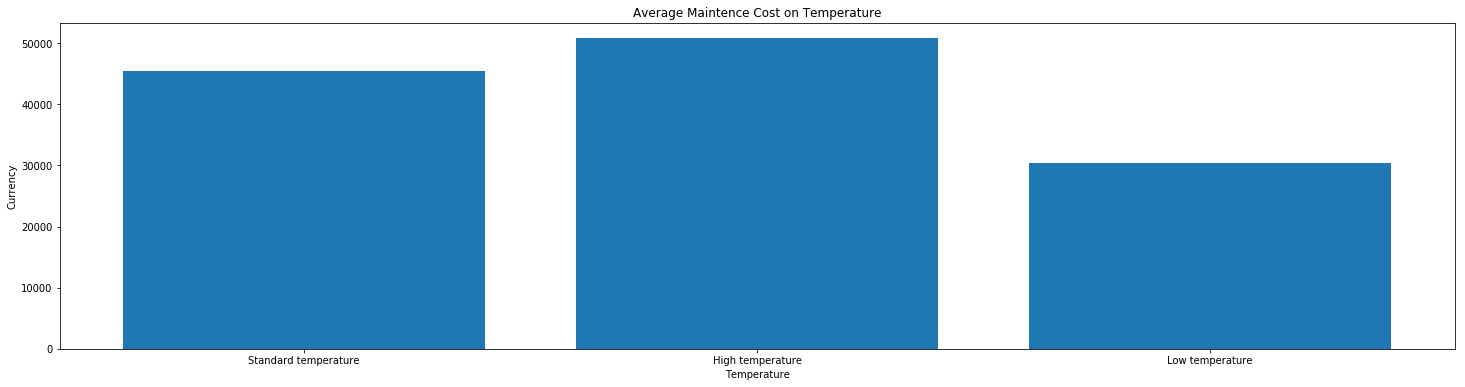

In [53]:
y = np.array([df[df['TemperatureClassName'] =='Standard temperature']['MaterialCost'].mean(), df[df['TemperatureClassName'] =='High temperature']['MaterialCost'].mean(),
              df[df['TemperatureClassName'] =='Low temperature']['MaterialCost'].mean()])
x = ['Standard temperature', 'High temperature', 'Low temperature' ]
plt.bar(x, y)
plt.title("Average Maintence Cost on Temperature")
plt.ylabel("Currency")
plt.xlabel("Temperature")
plt.show()

We can see that High Temperature is having high cost as compared to low temperature.

# Checking the Correlation Matrix

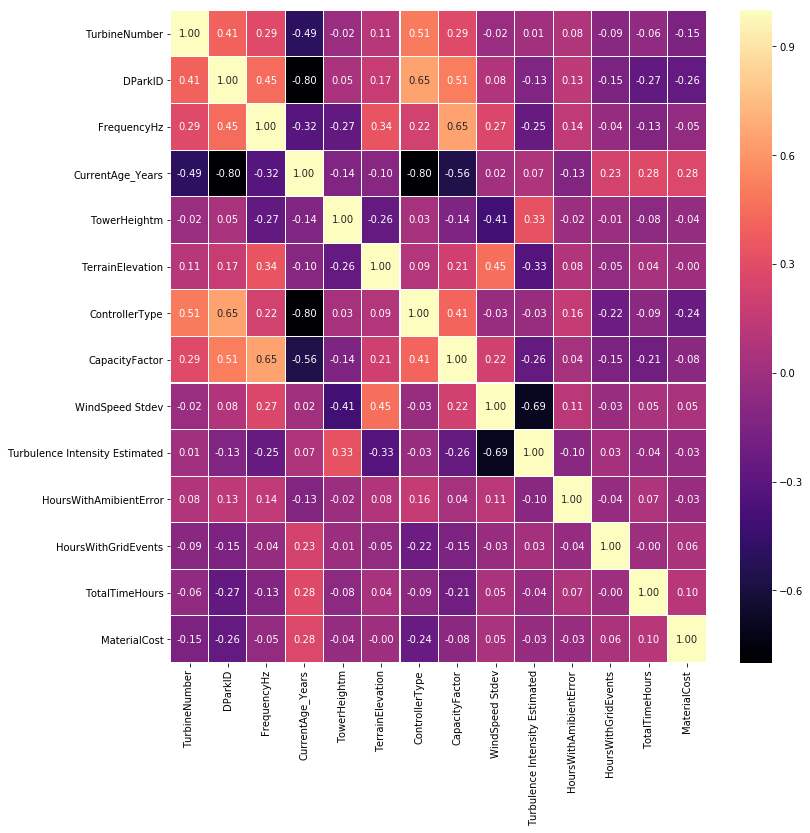

In [54]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Here we can see CurrentAge_years, TotalTimeHours and WindSpeed Stdev
Contributing to Material Cost More.

# Our 5 variables will be: Country, Temperature, CurrentAge_years, TotalTimeHours and WindSpeed Stdev

Changing Categorical Variable Temperature with the following values

In [57]:
df['TemperatureClassName'].replace('Standard temperature', 0, inplace=True)
df['TemperatureClassName'].replace('Low temperature',-1, inplace=True)
df['TemperatureClassName'].replace('High temperature', 1, inplace=True)

Creating the final data set

In [58]:
finalDF = df[['Country', 'TemperatureClassName', 'CurrentAge_Years', 'TotalTimeHours', 'MaterialCost']]

X = finalDF.iloc[:,:-1].values
y = finalDF.iloc[:, 4].values

Using One hot endcoder for country column

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

 Splitting the dataset into the Training set and Test set

In [61]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\z021753\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
y_pred = regressor.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_pred))

r_square score:  0.6533497274660598
